In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [27]:
est_model20 = [0.08272727, 0.08454545, 0.07818182, 0.09272727, 0.09818182, np.nan, np.nan]
est_model100 = [0.06545455, 0.06272727, 0.05818182, 0.06818182, 0.06363636, np.nan, np.nan,]
est_model2000 = [np.nan, np.nan, np.nan, 0.05727273, 0.05727273, 0.05909091, 0.05909091]


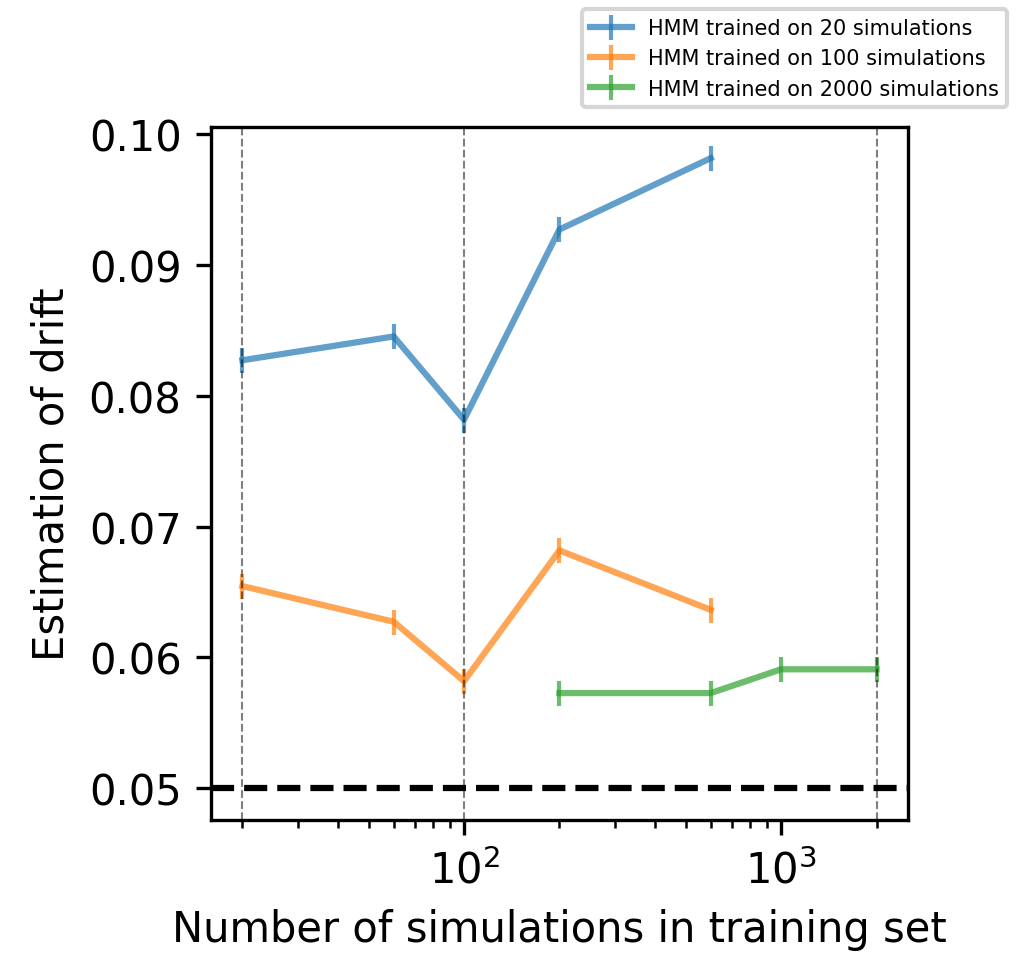

In [28]:
fig = plt.figure(figsize=(3, 3), dpi=300, constrained_layout=False, facecolor='w')
gs = fig.add_gridspec(1, 1, )
row = gs[0,0].subgridspec(1, 1)
ax = plt.subplot(row[:])

ax.plot([20,60,100,200,600,1000,2000], est_model20, marker='|', alpha=0.7, label='HMM trained on 20 simulations')
ax.plot([20,60,100,200,600,1000,2000], est_model100, marker='|', alpha=0.7, label='HMM trained on 100 simulations')
ax.plot([20,60,100,200,600,1000,2000], est_model2000, marker='|', alpha=0.7, label='HMM trained on 2000 simulations')

ax.axhline(0.05, color='k', linestyle='--')
ax.axvline(20, color='k', linestyle='--', linewidth=0.5, alpha = 0.5)
ax.axvline(100, color='k', linestyle='--', linewidth=0.5, alpha = 0.5)
ax.axvline(2000, color='k', linestyle='--', linewidth=0.5, alpha = 0.5)

ax.set_xscale('log')
ax.set_xlabel('Number of simulations in training set')
ax.set_ylabel('Estimation of drift')

fig.legend(fontsize = 5)

  5%|▌         | 1/20 [03:13<1:01:12, 193.30s/it]

[0.06693878]


 10%|█         | 2/20 [06:36<59:46, 199.26s/it]  

[0.06693878]


 15%|█▌        | 3/20 [10:08<58:02, 204.85s/it]

[0.06693878]


 20%|██        | 4/20 [13:11<52:23, 196.48s/it]

[0.06693878]


 25%|██▌       | 5/20 [16:05<47:00, 188.06s/it]

[0.06693878]


 30%|███       | 6/20 [18:56<42:35, 182.55s/it]

[0.06693878]


 35%|███▌      | 7/20 [22:18<40:55, 188.87s/it]

[0.06693878]


 40%|████      | 8/20 [26:05<40:11, 200.95s/it]

[0.06877551]


 45%|████▌     | 9/20 [29:37<37:29, 204.49s/it]

[0.06877551]


 50%|█████     | 10/20 [33:16<34:48, 208.87s/it]

[0.06693878]


 55%|█████▌    | 11/20 [37:03<32:09, 214.38s/it]

[0.06693878]


 60%|██████    | 12/20 [41:04<29:39, 222.43s/it]

[0.06693878]


 65%|██████▌   | 13/20 [45:02<26:30, 227.23s/it]

[0.06693878]


 70%|███████   | 14/20 [48:41<22:27, 224.66s/it]

[0.06693878]


 75%|███████▌  | 15/20 [51:51<17:51, 214.35s/it]

[0.06510204]


 80%|████████  | 16/20 [55:08<13:55, 208.99s/it]

[0.06877551]


 85%|████████▌ | 17/20 [58:38<10:28, 209.48s/it]

[0.06510204]


 90%|█████████ | 18/20 [1:01:54<06:50, 205.41s/it]

[0.06877551]


 95%|█████████▌| 19/20 [1:05:05<03:21, 201.01s/it]

[0.06510204]


100%|██████████| 20/20 [1:08:30<00:00, 205.54s/it]


[0.06693878]


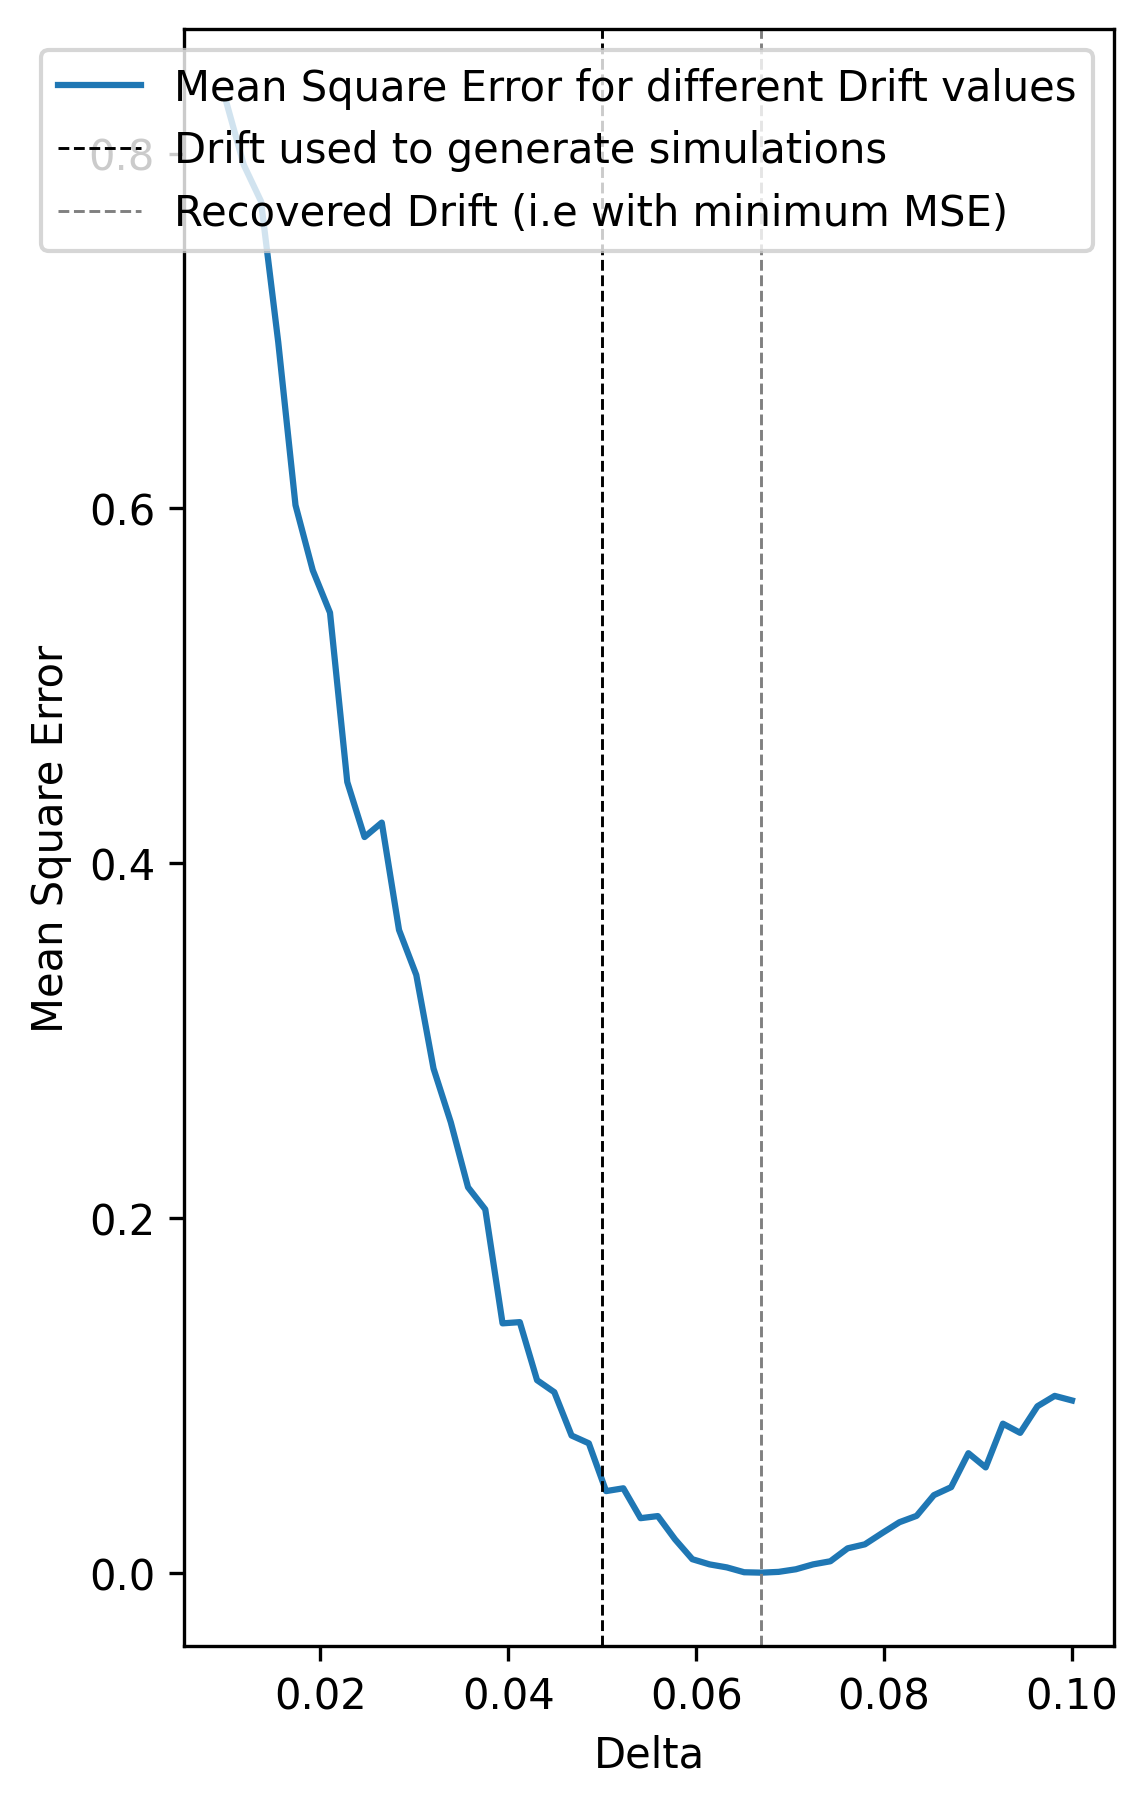

In [40]:
#######################
### Import packages ###
#######################

import matplotlib.pyplot as plt
import sys
import time
from IPython.core import ultratb
import dill
import numpy as np
from tqdm import tqdm
import scipy.optimize as opt
import noisyopt 
from synthetic_data_generation_functions import *
from synthetic_data_analysis_functions import *
sys.excepthook = ultratb.FormattedTB(call_pdb=False)


# Time counter
start_time = time.time()

##################
### Parameters ###
##################

steps_number = 20
noise_amplitude = 0.1
# delta = 0.05
drift = 0.0
p_a = 0.5
p_a_reward = 1

# np.random.seed(58777) # initial seed
# np.random.seed(587) # test seed
# np.random.seed(50) # test seed

# n_simulations_list = [20,60,100,200,600,1000,2000]
n_simulations_list = [5000]



####################
### Computations ###
####################

delta_range = np.linspace(0.01,0.1,50)

def callback(xk):
    print("Current solution: ", xk)

recompute_mse = True

with open(f'/home/david/Documents/code/phd/DDM/statistical_precision_analysis/simulations_batches/simulations_batch_{60}.pkl', 'rb') as file:
            synthetic_data = dill.load(file)

with open(f'/home/david/Documents/code/phd/DDM/statistical_precision_analysis/simulations_batches/best_model_score_{60}_fulltraining.pkl', 'rb') as file:
            model = dill.load(file)

choices_sequences = [synth_data['choices'] for synth_data in synthetic_data]

reconstructed_average_proba_sequence = compute_reconstructed_average_proba_sequence(choices_sequences, model)

mse_list = []

args = [p_a, p_a_reward, steps_number, noise_amplitude, drift, 5000, reconstructed_average_proba_sequence]

# res = noisyopt.minimizeCompass(compute_mean_square_error_opt, [0.5], args=[args], paired=False, disp=True)
# res = opt.minimize(compute_mean_square_error_opt, [0.5], args=args, options={'disp': True}, callback=callback, method='Powell')

# print(res)


for _ in tqdm(range(20)):
    
    mse_list = []

    for delta in delta_range:

        mse_list.append(compute_mean_square_error(delta, args))

    min_mse = np.min(mse_list)
    recovered_delta = delta_range[np.where(mse_list==min_mse)[0]]

    print(recovered_delta)

# with open(f'DDM/statistical_precision_analysis/simulations_batches/mse_{5000}_fulltraining.pkl', 'wb') as file:
#     dill.dump([delta_range,mse_list], file)



    

# quit() #################################################################################
############
### Plot ###
############

fig=plt.figure(figsize=(4, 7), dpi=300, constrained_layout=False, facecolor='w')
gs = fig.add_gridspec(1, 1, hspace=0.5,)
row = gs[0,0].subgridspec(3, 1)

ax = plt.subplot(row[:])

ax.plot(delta_range,mse_list, label="Mean Square Error for different Drift values")
ax.axvline(0.05, linewidth=0.7, color='k', linestyle='--', label='Drift used to generate simulations')
ax.axvline(recovered_delta, linewidth=0.7,color='grey', linestyle='--', label='Recovered Drift (i.e with minimum MSE)')

ax.set_xlabel('Delta')
ax.set_ylabel('Mean Square Error')

ax.legend()

plt.show()








In [ ]:
#######################
### Import packages ###
#######################

import matplotlib.pyplot as plt
import sys
import time
from IPython.core import ultratb
import dill
import numpy as np
from tqdm import tqdm
import scipy.optimize as opt
import noisyopt 
from synthetic_data_generation_functions import *
from synthetic_data_analysis_functions import *
sys.excepthook = ultratb.FormattedTB(call_pdb=False)


# Time counter
start_time = time.time()

##################
### Parameters ###
##################

steps_number = 20
noise_amplitude = 0.1
# delta = 0.05
drift = 0.0
p_a = 0.5
p_a_reward = 1

# np.random.seed(58777) # initial seed
# np.random.seed(587) # test seed
# np.random.seed(50) # test seed

# n_simulations_list = [20,60,100,200,600,1000,2000]
n_simulations_list = [5000]



####################
### Computations ###
####################

delta_range = np.linspace(0.01,0.1,50)

def callback(xk):
    print("Current solution: ", xk)

recompute_mse = True

with open(f'/home/david/Documents/code/phd/DDM/statistical_precision_analysis/simulations_batches/simulations_batch_{60}.pkl', 'rb') as file:
            synthetic_data = dill.load(file)

with open(f'/home/david/Documents/code/phd/DDM/statistical_precision_analysis/simulations_batches/best_model_score_{60}_fulltraining.pkl', 'rb') as file:
            model = dill.load(file)

choices_sequences = [synth_data['choices'] for synth_data in synthetic_data]

reconstructed_average_proba_sequence = compute_reconstructed_average_proba_sequence(choices_sequences, model)

mse_list = []

args = [p_a, p_a_reward, steps_number, noise_amplitude, drift, 5000, reconstructed_average_proba_sequence]

# res = noisyopt.minimizeCompass(compute_mean_square_error_opt, [0.5], args=[args], paired=False, disp=True)
# res = opt.minimize(compute_mean_square_error_opt, [0.5], args=args, options={'disp': True}, callback=callback, method='Powell')

# print(res)


for _ in tqdm(range(20)):
    
    mse_list = []

    for delta in delta_range:

        mse_list.append(compute_mean_square_error(delta, args))

    min_mse = np.min(mse_list)
    recovered_delta = delta_range[np.where(mse_list==min_mse)[0]]

    print(recovered_delta)

# with open(f'DDM/statistical_precision_analysis/simulations_batches/mse_{5000}_fulltraining.pkl', 'wb') as file:
#     dill.dump([delta_range,mse_list], file)



    

# quit() #################################################################################
############
### Plot ###
############

fig=plt.figure(figsize=(4, 7), dpi=300, constrained_layout=False, facecolor='w')
gs = fig.add_gridspec(1, 1, hspace=0.5,)
row = gs[0,0].subgridspec(3, 1)

ax = plt.subplot(row[:])

ax.plot(delta_range,mse_list, label="Mean Square Error for different Drift values")
ax.axvline(0.05, linewidth=0.7, color='k', linestyle='--', label='Drift used to generate simulations')
ax.axvline(recovered_delta, linewidth=0.7,color='grey', linestyle='--', label='Recovered Drift (i.e with minimum MSE)')

ax.set_xlabel('Delta')
ax.set_ylabel('Mean Square Error')

ax.legend()

plt.show()








In [14]:
drift_matrix = np.array([[2,-2],
                         [-1,1]])

reward = 0
action = 1

drift = np.matmul(drift_matrix,np.array([[reward],[1-reward]]))
drift = np.matmul(drift,np.array([[action,1-action]]))

drift = np.matmul(np.array([reward,1-reward]), drift_matrix)
drift = np.matmul(np.array([action,1-action]), drift)


print(drift)

-1
